# Basic usage of KCF-Convoy

- As a basic import, import the following things

In [1]:
from IPython.display import Image
%matplotlib inline
import kcfconvoy as kcf

/opt/conda/envs/kcfconvoy/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Basic class
- Basic classes include the following
    - KCFvec (KCF vector)
    - KCFmat (KCF matrix)

### KCFvec (KCF vector)
- There are the following as input form
    - KEGG ID https://www.kegg.jp
    - KNApSAcK ID http://kanaya.naist.jp/KNApSAcK/
    - Molfile
    - InChI
    - RDKmol
- As the class method, the following correspond to each other
    - `input_from_kegg(cid, cpd_name=str)`
        - Download from KEGG_ID in mol format and save it as `./Kegg/cid.mol`
    - `input_from_knapsack(cid, cpd_name=str)`
        - Download from knapsack_ID in mol format and save it as `./knapsack/cid.mol`
    - `input_molfile(molfile, cpd_name=str)`
        - It accepts the path of molfile, not the entity of molfile.
    - `input_inchi(inchi, cpd_name=str)`
    - `input_smiles(smiles, cpd_name=str)`
    - `input_rdkmol(rdkmol, cpd_name=str)`

In [2]:
kcfvec_1 = kcf.KCFvec()
kcfvec_1.input_smiles('Oc1cnc(CO)cc1')
kcfvec_2 = kcf.KCFvec()
kcfvec_2.input_from_kegg('C00002', "ATP")

True

- The instance variables of KCFvec are listed below
    - `n_atoms`
        - Number of atoms in a compound
    - `n_bonds`
        - Number of edges in a compound
    - `mol`
        - RDKmol generated by RDKit
    - `cpd_name`
        - Name of compound
    - `kegg_atom_label`
        - The labels for KCF generated from RDKmol
    - `molblock_atoms`
        - The atom blocks in the Molfile format
    - `molblock_bonds`
        - The bond blocks in the Molfile format
    - `kcf_vec`
        - KCF Vector
    - `ring_string`
        - The strings that represent the ring substructures and their atom IDs.
    - `subs_string`
        - The strings that represent the other substructures and their atom IDs.

In [3]:
print(kcfvec_1.n_atoms)
print(kcfvec_1.n_bonds)
print(kcfvec_1.mol)
print(kcfvec_1.cpd_name)
print(kcfvec_1.kegg_atom_label)
print(kcfvec_1.molblock_atoms)
print(kcfvec_1.molblock_bonds)

9
9
NoName
{0: {'atom_species': 'O', 'atom_class': 'O1', 'kegg_atom': 'O1a'}, 1: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8y'}, 2: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8x'}, 3: {'atom_species': 'N', 'atom_class': 'N5', 'kegg_atom': 'N5x'}, 4: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8y'}, 5: {'atom_species': 'C', 'atom_class': 'C1', 'kegg_atom': 'C1b'}, 6: {'atom_species': 'O', 'atom_class': 'O1', 'kegg_atom': 'O1a'}, 7: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8x'}, 8: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8x'}}
{0: ['3.0000', '0.0000', '0.0000'], 1: ['1.5000', '0.0000', '0.0000'], 2: ['0.7500', '-1.2990', '0.0000'], 3: ['-0.7500', '-1.2990', '0.0000'], 4: ['-1.5000', '0.0000', '0.0000'], 5: ['-3.0000', '0.0000', '0.0000'], 6: ['-3.7500', '1.2990', '0.0000'], 7: ['-0.7500', '1.2990', '0.0000'], 8: ['0.7500', '1.2990', '0.0000']}
[['1', '2', '1', '0'], ['2', '3', '2', '0'], ['3', '4', '1', '0'], ['4'

- In order to generate KCF vectors, it is necessary to execute the following method
    - `convert_kcf_vec(levels=int_list, attributes=int_list)`
        - `levels`
            - the levels of the three-letter KEGG Atom types. e.g., "C1a" means a methyl carbon (i.e., an sp3 carbon that locates at the terminal). In this case, levels=[0] yields "C", levels=[0,1] yields "C1", and levels=[0,1,2] yields "C1a". See https://www.genome.jp/kegg/reaction/KCF.html for the list of KEGG Atome types. In default, levels is set to [0,1,2]
        - `attributes`
            - the attributes of the chemical substctures. e.g., 0: atom, 1: bond, 2: triplet, 3: vicinity, 4: ring, 5: other attributes of substructures. If the users want to use atom, bond and triplet, set attrbutes=[0,1,2]. In default, attributes is set to [0, 1, 2, 3, 4, 5]. See https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-7-S6-S2 for more detail.

In [4]:
kcfvec_1.convert_kcf_vec()
kcfvec_2.convert_kcf_vec()

True

In [5]:
print(kcfvec_1.kcf) # output as a KCF format file

ENTRY       NoName                        Compound
ATOM        9    
            1   O1a O    3.0000   0.0000  
            2   C8y C    1.5000   0.0000  
            3   C8x C    0.7500   -1.2990 
            4   N5x N    -0.7500  -1.2990 
            5   C8y C    -1.5000  0.0000  
            6   C1b C    -3.0000  0.0000  
            7   O1a O    -3.7500  1.2990  
            8   C8x C    -0.7500  1.2990  
            9   C8x C    0.7500   1.2990  
BOND        9    
            1     1   2 1
            2     2   3 2
            3     3   4 1
            4     4   5 2
            5     5   6 1
            6     6   7 1
            7     5   8 1
            8     8   9 2
            9     9   2 1
///



In [6]:
print(kcfvec_1.ring_string) #  The strings that represent the ring substructures and their atom IDs.

[{'1,2,3,4,7,8': 'C-C-C-C-C-N,1-6'}, {'1,2,3,4,7,8': 'C8-C8-C8-C8-C8-N5,1-6'}, {'1,2,3,4,7,8': 'C8x-C8x-C8y-C8x-N5x-C8y,1-6'}]


In [7]:
print(kcfvec_1.subs_string) #  The strings that represent the other substructures and their atom IDs.

[{'1,2': 'C-C', '1,4,5,7,8': 'C-C-C-C-C', '1,4,7,8': 'C-C-C-C', '1,7,8': 'C-C-C', '1,8': 'C-C', '1,2,4,5,7,8': 'C-C-C-C-C-C', '1,2,4,7,8': 'C-C-C-C-C', '1,2,7,8': 'C-C-C-C', '1,2,8': 'C-C-C', '4,7,8': 'C-C-C', '4,7': 'C-C', '4,5': 'C-C', '4,5,7,8': 'C-C-C-C', '4,5,7': 'C-C-C', '7,8': 'C-C', '0,1,7,8': 'C-C-C-O', '0,1,2,3': 'N-C-C-O', '0,1,2': 'C-C-O', '0,1,8': 'C-C-O', '0,1': 'C-O', '0,1,2,3,7,8': 'C-C-C-C-N,3-O', '1,2,3,4': 'C-C-N-C', '1,2,3': 'C-C-N', '0,1,2,7,8': 'C-C-C-C,2-O', '2,3,4,5': 'C-C-N-C', '2,3,4,7': 'C-C-N-C', '2,3,4': 'C-N-C', '2,3': 'C-N', '2,3,4,5,7': 'C-N-C-C,3-C', '1,2,3,8': 'C-C-C-N', '0,1,2,3,8': 'C-C-C-N,2-O', '3,4,7,8': 'C-C-C-N', '3,4,5,6': 'N-C-C-O', '3,4,5': 'C-C-N', '3,4,7': 'C-C-N', '3,4': 'C-N', '3,4,5,6,7,8': 'N-C-C-C,2-C-O', '4,5,6': 'C-C-O', '2,3,4,5,7,8': 'C-C-C-C,2-N-C', '5,6': 'C-O', '4,5,6,7': 'C-C-C-O', '3,4,5,6,7': 'O-C-C-C,3-N', '2,3,4,5,6,7': 'C-C-C-O,2-N-C', '3,4,5,7,8': 'C-C-C-C,3-N', '0,1,4,7,8': 'C-C-C-C-O', '0,1,2,3,4': 'C-N-C-C-O', '0,1,2,3

## Depiction
- As a method for drawing, there are the following:
    - `draw_cpd(image_file=file_name)`
        - Drawing of compounds
        - Save it in the execution directory with the name of image_file
    - `draw_cpd_with_labels(start=0, custom_label=dict)`
        - Drawing of labeled compounds

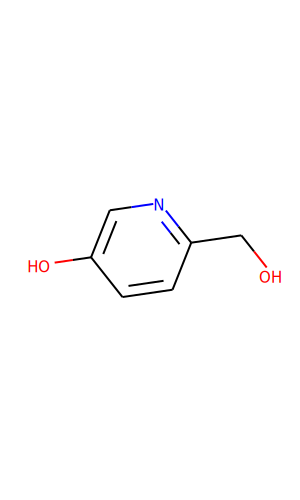

In [8]:
kcfvec_1.draw_cpd(image_file="mol_1.svg")

{0: 'O1a', 1: 'C8y', 2: 'C8x', 3: 'N5x', 4: 'C8y', 5: 'C1b', 6: 'O1a', 7: 'C8x', 8: 'C8x'}


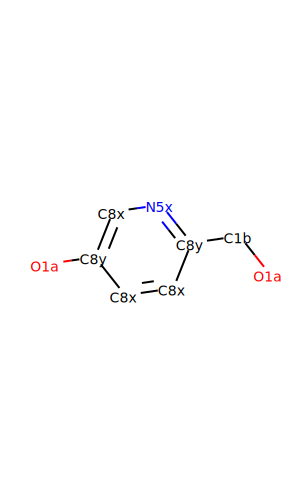

In [9]:
atom_label = {key: value["kegg_atom"] for key, value in kcfvec_1.kegg_atom_label.items()}
print(atom_label) # KEGG Atom types for each atoms
kcfvec_1.draw_cpd_with_labels(custom_label=atom_label)

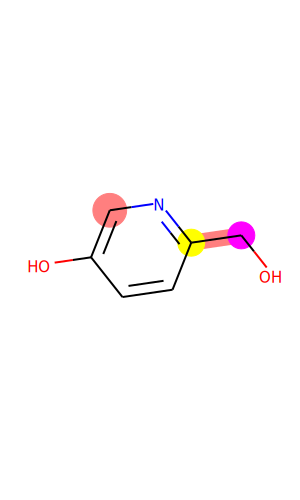

In [10]:
atoms = [2, 4, 5]
colors = {4: (1,1,0), 5: (1,0,1)}
radius = {2: 0.5, 5: 0.4}
kcfvec_1.draw_cpd(image_file="mol_1.svg", highlightAtoms=atoms, highlightAtomColors=colors, highlightAtomRadii=radius)

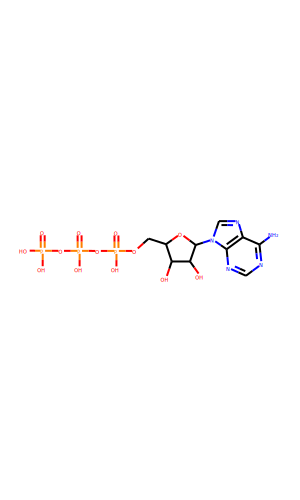

In [11]:
kcfvec_2.draw_cpd(image_file="mol_3.svg")

{0: 'O1a', 1: 'C8y', 2: 'C8x', 3: 'N5x', 4: 'C8y', 5: 'C1b', 6: 'O1a', 7: 'C8x', 8: 'C8x'}


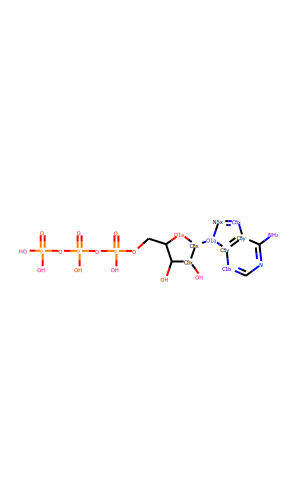

In [12]:
atom_labe2 = {key: value["kegg_atom"] for key, value in kcfvec_2.kegg_atom_label.items()}
print(atom_label)
kcfvec_2.draw_cpd_with_labels(custom_label=atom_label)

In [13]:
kcfvec_2.string2seq('C1y-C1b-O2b')

['11,16,18']

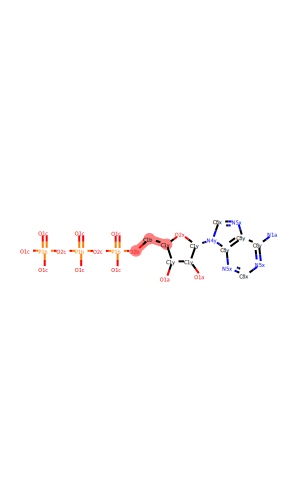

In [14]:
atom_label = {key: value["kegg_atom"] for key, value in kcfvec_2.kegg_atom_label.items()}
kcfvec_2.draw_cpd_with_highlighted_substructure(subs_string='C1y-C1b-O2b', custom_label=atom_label)

## Other methods

- Other methods have the following
    - `find_seq(length, bidirectonal=bool)`
        - returns the list of atom IDs whose lengths equals or less than the defined length. "bidirectonal" determines if the molecular graph is dealt as a bidirectional graph or not.
    - `has_bond(atom_1, atom_2)`
        - True if atom_1 and atom_2 are connected. False otherwise.
    - `get_symbol(atom_index)`
        - returns the symbol of atomic element (e.g., "C" for a cabon atom) for the specified atom by atom_index
    - `get_triplets()`
        - returns the list of atom IDs that consists of triplet substructures
    - `get_vicinities()`
        - returns the list of atom IDs that consists of vicinity substructures
    - `get_pandas_df()`
        - returns the KCF vector as a Pandas Dataframe
    - `string2seq()`
        - returns a dictionary in which the keys are the substructure string and the values are the corresponding list of atom IDs.

In [15]:
#  find_seq(self, length, bidirectonal=True):
# the atom sting for which the length <= 5
subgraphs_5 = kcfvec_1.find_seq(5)
for subgraph in subgraphs_5:
    print(subgraph)

[0, 1, 0]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 8, 7, 4]
[0, 1, 8, 7]
[0, 1, 8]
[1, 0, 1]
[1, 2, 1]
[1, 8, 7, 4, 3, 2, 1]
[1, 2, 3]
[1, 8, 7, 4, 3]
[1, 2, 3, 4]
[1, 8, 7, 4]
[1, 2, 3, 4, 5]
[1, 8, 7, 4, 5]
[1, 2, 3, 4, 7]
[1, 8, 7]
[1, 2, 3, 4, 7, 8, 1]
[1, 8, 1]
[2, 1, 0]
[2, 1, 2]
[2, 3, 4, 7, 8, 1, 2]
[2, 1, 8, 7, 4, 3, 2]
[2, 3, 2]
[2, 1, 8, 7, 4]
[2, 3, 4]
[2, 3, 4, 5]
[2, 3, 4, 5, 6]
[2, 1, 8, 7]
[2, 3, 4, 7]
[2, 1, 8]
[2, 3, 4, 7, 8]
[3, 2, 1, 0]
[3, 2, 1]
[3, 4, 7, 8, 1]
[3, 2, 3]
[3, 4, 7, 8, 1, 2, 3]
[3, 2, 1, 8, 7, 4, 3]
[3, 4, 3]
[3, 4, 5]
[3, 4, 5, 6]
[3, 2, 1, 8, 7]
[3, 4, 7]
[3, 2, 1, 8]
[3, 4, 7, 8]
[4, 3, 2, 1, 0]
[4, 7, 8, 1, 0]
[4, 3, 2, 1]
[4, 7, 8, 1]
[4, 3, 2]
[4, 7, 8, 1, 2]
[4, 3, 4]
[4, 7, 8, 1, 2, 3, 4]
[4, 5, 4]
[4, 5, 6]
[4, 3, 2, 1, 8, 7, 4]
[4, 7, 4]
[4, 3, 2, 1, 8]
[4, 7, 8]
[5, 4, 3, 2, 1]
[5, 4, 7, 8, 1]
[5, 4, 3, 2]
[5, 4, 3]
[5, 4, 5]
[5, 6, 5]
[5, 4, 7]
[5, 4, 7, 8]
[6, 5, 4, 3, 2]
[6, 5, 4, 3]
[6, 5, 4]
[6, 5, 6]
[6, 5, 4, 7]
[6, 5, 4, 7, 8]

In [16]:
kcfvec_1.has_bond(0, 3)

False

In [17]:
kcfvec_1.has_bond(0, 4)

False

In [18]:
kcfvec_1.get_symbol(0)

'O'

In [19]:
triplets = kcfvec_1.get_triplets()
for triplet in triplets:
    print(triplet)

[0, 1, 0]
[0, 1, 2]
[0, 1, 8]
[1, 0, 1]
[1, 2, 1]
[1, 2, 3]
[1, 8, 7]
[1, 8, 1]
[2, 1, 0]
[2, 1, 2]
[2, 3, 2]
[2, 3, 4]
[2, 1, 8]
[3, 2, 1]
[3, 2, 3]
[3, 4, 3]
[3, 4, 5]
[3, 4, 7]
[4, 3, 2]
[4, 3, 4]
[4, 5, 4]
[4, 5, 6]
[4, 7, 4]
[4, 7, 8]
[5, 4, 3]
[5, 4, 5]
[5, 6, 5]
[5, 4, 7]
[6, 5, 4]
[6, 5, 6]
[7, 8, 1]
[7, 4, 3]
[7, 4, 7]
[7, 4, 5]
[7, 8, 7]
[8, 1, 0]
[8, 1, 8]
[8, 1, 2]
[8, 7, 4]
[8, 7, 8]


In [20]:
vicinities = kcfvec_1.get_vicinities()
for vicinity in vicinities:
    print(vicinity)

(0, [1])
(1, [0, 2, 8])
(2, [1, 3])
(3, [2, 4])
(4, [3, 5, 7])
(5, [4, 6])
(6, [5])
(7, [4, 8])
(8, [7, 1])


In [21]:
kcfvec_1.get_pandas_df()

,str,type,level,count
0,C-C-C,triplet,atom_species,18
1,C8-C8-C8,triplet,atom_class,14
2,C,atom,atom_species,6
3,C-C-O,triplet,atom_species,6
4,C-C-N,triplet,atom_species,6
5,C-C,bond,atom_species,5
6,C8,atom,atom_class,5
7,C8x-C8y-C8x,triplet,kegg_atom,5
8,C-N-C,triplet,atom_species,4
9,C8-C8,bond,atom_class,4


### KCFmat (KCF matrix)
- A set of KCF vectors dealing with more than two compounds
- There are the following as input form
    - KEGG ID https://www.kegg.jp
    - KNApSAcK ID http://kanaya.naist.jp/KNApSAcK/
    - Molfile
    - InChI
    - RDKmol
- As the class method, the following correspond to each other
    - `input_from_kegg(cid, cpd_name=str)`
        - Download from KEGG_ID in mol format and save it as `./Kegg/cid.mol`
    - `input_from_knapsack(cid, cpd_name=str)`
        - Download from knapsack_ID in mol format and save it as `./knapsack/cid.mol`
    - `input_molfile(molfile, cpd_name=str)`
        - It accepts the path of molfile, not the entity of molfile.
    - `input_inchi(inchi, cpd_name=str)`
    - `input_smiles(smiles, cpd_name=str)`
    - `input_rdkmol(rdkmol, cpd_name=str)`

In [22]:
kcfmat = kcf.KCFmat()

In [23]:
kcfmat.input_from_kegg('C00002', "ATP")
kcfmat.input_from_kegg('C00003', "NAD+")
kcfmat.input_from_kegg('C00004', "NADH")
kcfmat.input_from_kegg('C00005', "NADPH")
kcfmat.input_from_kegg('C00006', "NADP+")
kcfmat.input_from_kegg('C00008', "ADP")

True

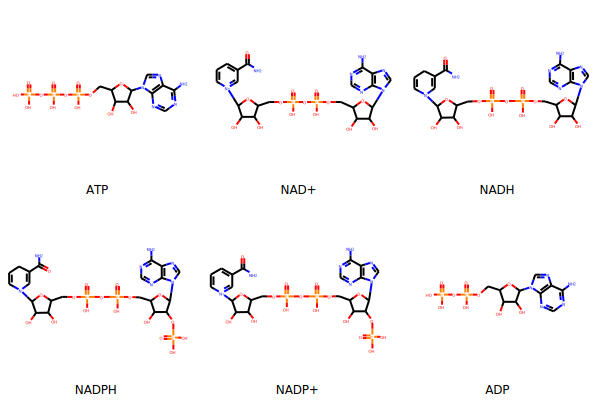

In [24]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
mols = [cpd.mol for cpd in kcfmat.cpds]
img = Draw.MolsToGridImage( mols, molsPerRow=3, useSVG=True, legends=kcfmat.names)
img

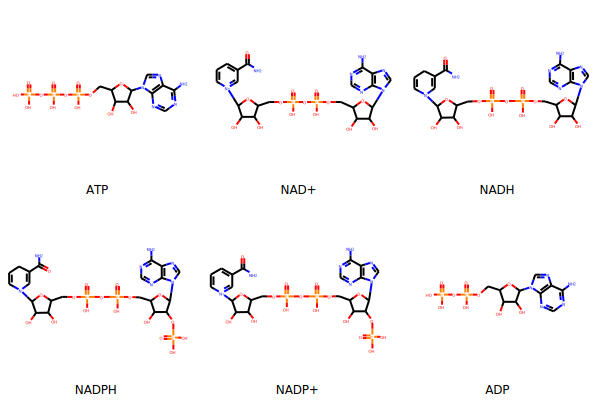

In [25]:
kcfmat.draw_cpds()

- When the users input the compounds into KCFmat, the following member variables are calculated automatically.
    - `inchis`
        - list of InChI strings for the compounds
    - `names`
        - list of names for the compounds 
    - `kcf_vecs`
        - list of KCF vectors for the compounds
    - `all_strs`
        - list of all the substructure strings within the KCF vector

In [26]:
print(kcfmat.inchis[0])

InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(3-14-5)10-7(17)6(16)4(26-10)1-25-30(21,22)28-31(23,24)27-29(18,19)20/h2-4,6-7,10,16-17H,1H2,(H,21,22)(H,23,24)(H2,11,12,13)(H2,18,19,20)


In [27]:
print(kcfmat.names)

['ATP', 'NAD+', 'NADH', 'NADPH', 'NADP+', 'ADP']


In [28]:
print(kcfmat.kcf_vecs[0])

In [29]:
print(kcfmat.all_strs)

['C8y-C8y-N5x-C8x-N4y-C1y-O2x-C1y-C1y-C1y-O1a', 'C8x-N5x-C8y-N4y-C8x-N5x-C8y-C8y-N1a', 'O1c-P1b-O2b-C1y-C1y-O2x-C1y-C1b-O2b-P1b-O2c', 'C-C-C-C-C-N-C-C-C-C-C', 'C5a-C8y-C8x-C8x-C8x-N5y', 'C-C-C-C-C,2-C-N-C,5-7', 'C1y-N5y-C8x-C8x,2-C8x-C8y', 'C1-C1-C1-O2-P1,2-O2-C1-C1,7-N4', 'O-C-C-C-C-O-P-O-P', 'C1-C1-C1-C1-N5-C8-C8-C5', 'C1y-C1y-C1y-C1b-O2b-P1b-O1c,6-O1c,6-O2c,3-O2x-C1y-N5y-C8x,12-C8x,2-O1a', 'C1x-C2x-C2x-N1y-C2x-C2y,1-6', 'C8-C8-C8-N4-C1-C1-C1,6-O2,5-O2-C1,2-N5-C8-4,3-N5,13-C8-N5', 'C-C-C-C-N-C-C-C-C-C-O-P,6-O-9,12-O,12-O,7-O,8-O,5-C', 'C8x-N4y-C8y-C8y-C8y-N5x', 'C5a-O5a-C5a', 'C1y-C1y-C1y-C1y-C1b-O2b-P1b-O2c-P1b-O2b', 'C1y-N5y-C8x-C8y-C5a-O5a', 'C1-O2-P1-O2-P1-O2-P1-O1', 'C2-C2-N1-C1-C1-O1', 'N1a-C5a-C2y-C2x-N1y-C1y-O2x', 'C1y-C1y-C1y-N1y-C2x-C2y-C5a-N1a', 'C1y-C1y-C1y-N4y-C8x-N5x-C8y-C8y-N1a,7-C8y-N5x,8-N5x,12-C8x,3-O2x-C1y-C1b-O2b-P1b-O1c,18-O1c,18-O2c,2-O2b-P1b-O1c,23-O1c,23-O1c,4-10,11-13', 'O1-P1-O2-C1-C1-C1-C1-C1-N5-C8,9-C8,5-O2-8,10-C8,11-C8,2-O2-P1-O2-C1-C1-C1-C1-C1,21-O2,19-

- `calc_kcf_matrix(ratio=400)`
    - The users need to run this method in order to obtain the KCF matrix in the Numpy array format.
    - `all_mat` contains all substructures, which may contain the substructures found in only few compounds. len(`all_mat`) corresponds to the number of compounds.
    - `mat` contains limited substuctures for which the frequency (occurrence) values are more than len(`all_mat`) / `ratio` .
    - `mask_array` represents whether or not `mat` contains the substructure in `all_mat` .

In [30]:
kcfmat.calc_kcf_matrix()

True

In [31]:
print(kcfmat.all_mat)

[[1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 1]
 [0 1 3 ... 1 1 1]
 [0 1 3 ... 0 1 1]
 [1 1 0 ... 0 0 1]]


In [32]:
kcfmat.all_mat.shape

(6, 5494)

In [33]:
print(kcfmat.mask_array)

[ True  True  True ...  True  True  True]


In [34]:
print(kcfmat.strs)

['C8y-C8y-N5x-C8x-N4y-C1y-O2x-C1y-C1y-C1y-O1a', 'C8x-N5x-C8y-N4y-C8x-N5x-C8y-C8y-N1a', 'O1c-P1b-O2b-C1y-C1y-O2x-C1y-C1b-O2b-P1b-O2c', 'C-C-C-C-C-N-C-C-C-C-C', 'C5a-C8y-C8x-C8x-C8x-N5y', 'C-C-C-C-C,2-C-N-C,5-7', 'C1y-N5y-C8x-C8x,2-C8x-C8y', 'C1-C1-C1-O2-P1,2-O2-C1-C1,7-N4', 'O-C-C-C-C-O-P-O-P', 'C1-C1-C1-C1-N5-C8-C8-C5', 'C1y-C1y-C1y-C1b-O2b-P1b-O1c,6-O1c,6-O2c,3-O2x-C1y-N5y-C8x,12-C8x,2-O1a', 'C8-C8-C8-N4-C1-C1-C1,6-O2,5-O2-C1,2-N5-C8-4,3-N5,13-C8-N5', 'C-C-C-C-N-C-C-C-C-C-O-P,6-O-9,12-O,12-O,7-O,8-O,5-C', 'C8x-N4y-C8y-C8y-C8y-N5x', 'C1y-C1y-C1y-C1y-C1b-O2b-P1b-O2c-P1b-O2b', 'C1y-N5y-C8x-C8y-C5a-O5a', 'C2-C2-N1-C1-C1-O1', 'N1a-C5a-C2y-C2x-N1y-C1y-O2x', 'C1y-C1y-C1y-N1y-C2x-C2y-C5a-N1a', 'C1y-C1y-C1y-N4y-C8x-N5x-C8y-C8y-N1a,7-C8y-N5x,8-N5x,12-C8x,3-O2x-C1y-C1b-O2b-P1b-O1c,18-O1c,18-O2c,2-O2b-P1b-O1c,23-O1c,23-O1c,4-10,11-13', 'C1b-O2b-P1b-O2c-P1b-O2b-C1b-C1y-C1y-C1y-C1y,10-O2b,8-O2x-11,11-N4y,9-O1a,5-O1c,5-O1c,3-O1c,3-O1c', 'N1-C8-C8-N5-C8-N4', 'C5a-C2y-C2x-N1y-C1y-O2x-C1y-C1b-O2b-P1b-O

In [35]:
print(kcfmat.mat)

[[1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 1]
 [0 1 3 ... 1 1 1]
 [0 1 3 ... 0 1 1]
 [1 1 0 ... 0 0 1]]


In [36]:
kcfmat.mat.shape

(6, 4941)

In [76]:
kcfmat.strs[4]

'C5a-C8y-C8x-C8x-C8x-N5y'

In [77]:
kcfmat.mat[:,4]

array([0, 1, 0, 0, 1, 0])

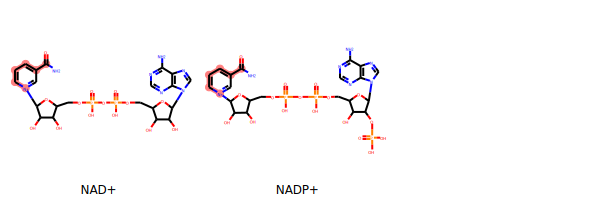

In [78]:
kcfmat.draw_cpds(kcfstringidx=4)

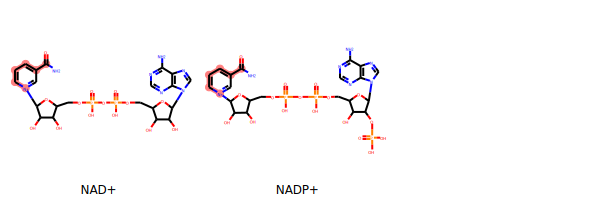

In [79]:
kcfmat.draw_cpds(kcfstring='C5a-C8y-C8x-C8x-C8x-N5y')

### Similarity measures between two KCF vectors
`similarity` calculates similarity between two KCF vectors     
- similarity(kcf_vec_1, kcf_vec_2, n_nodes=list(range(100)), levels=[0, 1, 2])
    - kcf_vec_1, kcf_vec_2
        - KCF vectors of compounds 1 and 2, respectively.
    - `n_nodes`
        - specifies the size range of substructures by the numbers of nodes (atoms other than hydrogen atoms). In default, `n_nodes` is set to list(range(100)), meaning that the users consider the substructures ranging from 0 - 99 in size.
    - `levels`
         - the levels of the three-letter KEGG Atom types. e.g., "C1a" means a methyl carbon (i.e., an sp3 carbon that locates at the terminal). In this case, levels=[0] yields "C", levels=[0,1] yields "C1", and levels=[0,1,2] yields "C1a". See https://www.genome.jp/kegg/reaction/KCF.html for the list of KEGG Atome types. In default, `levels` is set to [0,1,2]
- The output consists of the following three numerals in a tuple:
    - The first numeral represents the weighted tanimoto similarity.
    - The second numeral represents the ratio of conserved substructures from compound 1 in compound 2.
    - The third numeral represents the ratio of conserved substructures from compound 2 in compound 1.

In [39]:
from kcfconvoy import similarity

In [40]:
similarity(kcfvec_1, kcfvec_2)

(0.03381995133819951, 0.3926553672316384, 0.035686777920410785)

In [41]:
similarity(kcfmat.kcf_vecs[1], kcfmat.kcf_vecs[2])

(0.6641890098221397, 0.7974501992031873, 0.7989781254989622)

## Calculating fingerprints implemented in RDKit

- The following fingerprints implemented in RDKit can also be calculated and incorporated easily into KCF matrix.
    - RDKFingerprint
    - PatternFingerprint
    - MorganFingerprint
    - LayeredFingerprint
    - PatternFingerprint
- By using `fingerprint` argument, the users can select the fingerprint. The calculated fingerprints are stored in `KCFmat.fps`

In [42]:
kcfmat.calc_fingerprints(fingerprint="MorganFingerprint")

True

In [43]:
print(kcfmat.fps)

[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee169156c0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee16915030>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee16915800>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee16915350>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee16915b20>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fee16915580>]
